In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import re
cluster = 4
file = f'/home/luismendes/DRAM-Research/addressmapping_4/output/stl_traces/addr_map/ddr4-example/yololite/cluster/addr_map_cluster_{cluster}.stl'

ptrn = re.compile(r'\d+\: \(\d+\) \w+ 0x([\d\w]+)')

with open(file) as f:
    accesses = f.readlines()
    accesses = [ access.replace('\n', '') for access in accesses ]
    f.close()

addresses = []
for access in accesses:
    address = ptrn.findall(access)
    if len(address) == 1:
        address = bin(int(address[0], 16))[2:].zfill(32)[::-1]
        addresses.append(address)
addresses

['00000000000000000000000010000001',
 '00000000000010000000000010000001',
 '00000000000001000000000010000001',
 '00000000000011000000000010000001',
 '00000000000000000000000000000101',
 '00000000000000011000000010000001',
 '00000000000010011000000010000001',
 '00000000000001011000000010000001',
 '00000000000011011000000010000001',
 '00000000000010001100000010000001',
 '00000000000001001100000010000001',
 '00000000000011001100000010000001',
 '00000000000000101100000010000001',
 '00000000000010010010000010000001',
 '00000000000001010010000010000001',
 '00000000000011110010000010000001',
 '00000000000000001010000010000001',
 '00000000000010101010000010000001',
 '00000000000001101010000010000001',
 '00000000000011011010000010000001',
 '00000000000000111010000010000001',
 '00000000000001000110000010000001',
 '00000000000000010110000010000001',
 '00000000000001110110000010000001',
 '00000000000000101110000010000001',
 '00000000000010101110000010000001',
 '00000000000001011110000010000001',
 

In [12]:
def count_bit_changes(binary_list, n):
    m = len(binary_list)  # Number of binary strings
    b = len(binary_list[0])  # Number of bits in each binary string

    # Initialize the result array with shape (m-n) x b
    result = np.zeros((m - n, b), dtype=int)

    # Convert binary strings to arrays of integers for easier comparison
    binary_array = np.array([[int(bit) for bit in binary] for binary in binary_list])

    # Iterate through the list, comparing n neighbors for each starting position
    for i in range(m - n):
        # Slice the neighbors we need to compare
        neighbors = binary_array[i:i + n + 1]
        # Compute the bitwise changes between consecutive neighbors
        changes = np.abs(np.diff(neighbors, axis=0))
        # Sum the changes across neighbors for each bit
        result[i] = changes.sum(axis=0)

    return result

In [13]:
bit_changes = count_bit_changes(addresses, 16)

output = np.asarray(bit_changes)
output.shape

(731, 32)

Bit changes for each position: [   0    0    0    0    0    0    0    0    0    0    0    0 9682 6434
 3536 3347 1922 1670 1133  432   96    0    0    0  201    0    0    0
    0  201    0    0]
Maximum changes: 9682
Bit position(s) with the most changes: [12]


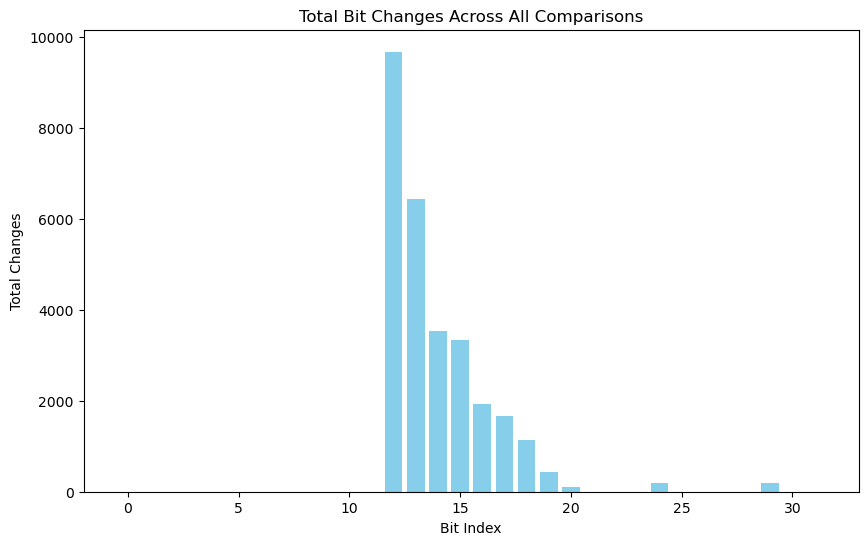

In [16]:
# Sum the bit changes for each bit position
bit_change_totals = np.sum(output, axis=0)

# Find the bit position(s) with the maximum changes
max_changes = np.max(bit_change_totals)
most_changed_bits = np.where(bit_change_totals == max_changes)[0]

# Display results
print("Bit changes for each position:", bit_change_totals)
print("Maximum changes:", max_changes)
print("Bit position(s) with the most changes:", most_changed_bits)

# Plotting the bit changes
plt.figure(figsize=(10, 6))
plt.bar(range(len(bit_change_totals)), bit_change_totals, color='skyblue')
plt.xlabel("Bit Index")
plt.ylabel("Total Changes")
plt.title("Total Bit Changes Across All Comparisons")
plt.show()
